In [1]:
import numpy as np

# Vidéo 10

In [14]:
def initialisation(m, n):
    # m nombre de lignes
    # n nombre de colonnes
    A = np.random.randn(m, n)
    B = np.ones((m, 1))
    C = np.concatenate((A, B), axis=1)
    return C

In [17]:
print(initialisation(5, 1))

[[ 0.41915959  1.        ]
 [ 0.45545091  1.        ]
 [ 0.95182093  1.        ]
 [-0.45596202  1.        ]
 [ 1.0442663   1.        ]]


# Vidéo 11

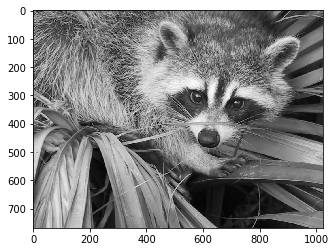

In [23]:
from scipy import misc
import matplotlib.pyplot as plt
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

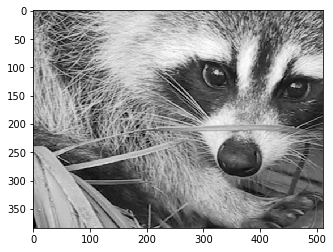

In [25]:
# Zoomer d'1/4 au centre
h = face.shape[0]
w = face.shape[1]
newFace = face[h//4:-h//4,w//4:-w//4]
plt.imshow(newFace, cmap=plt.cm.gray)
plt.show()

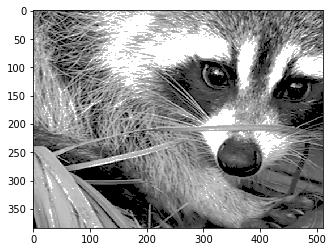

In [26]:
# Seuillage des pixels clairs & sombre
newFace[newFace<50] = 0
newFace[newFace>200] = 255
plt.imshow(newFace, cmap=plt.cm.gray)
plt.show()


# Vidéo 12

In [3]:
np.random.seed(0)
A = np.random.randint(0, 100, [10, 5])
A

array([[44, 47, 64, 67, 67],
       [ 9, 83, 21, 36, 87],
       [70, 88, 88, 12, 58],
       [65, 39, 87, 46, 88],
       [81, 37, 25, 77, 72],
       [ 9, 20, 80, 69, 79],
       [47, 64, 82, 99, 88],
       [49, 29, 19, 19, 14],
       [39, 32, 65,  9, 57],
       [32, 31, 74, 23, 35]])

In [18]:
print(A.mean(axis=0))
print(A.std(axis=0))
B = (A - A.mean(axis=0))/A.std(axis=0)
B

[ 44.5  47.   60.5  45.7  64.5]
[ 22.66384786  22.28003591  26.5678377   29.36341261  23.2432786 ]


array([[-0.02206157,  0.        ,  0.13173823,  0.72539252,  0.10755798],
       [-1.56637126,  1.61579632, -1.48676006, -0.33034307,  0.96802178],
       [ 1.12513992,  1.84021247,  1.03508612, -1.14768676, -0.27965074],
       [ 0.90452425, -0.35906585,  0.99744662,  0.0102168 ,  1.01104497],
       [ 1.6104944 , -0.44883231, -1.33620208,  1.0659524 ,  0.32267393],
       [-1.56637126, -1.21184724,  0.73397016,  0.7935045 ,  0.62383626],
       [ 0.11030784,  0.76301493,  0.80924915,  1.81518411,  1.01104497],
       [ 0.1985541 , -0.80789816, -1.56203905, -0.90929485, -2.17267111],
       [-0.24267724, -0.67324847,  0.16937773, -1.24985473, -0.32267393],
       [-0.55153918, -0.7181317 ,  0.50813319, -0.77307091, -1.26918412]])

# Vidéo 14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dataset = {f"Experience {i}": np.random.randn(100) for i in range(4)}

In [2]:
def graphique(dataset):
    nb = len(dataset)
       
    plt.figure(figsize=(12, 8))
    i=1
    for (k, v) in dataset.items():
        plt.subplot(nb, 1, i)
        plt.title(k)
        plt.plot(v)
        i = i+1
    plt.show()

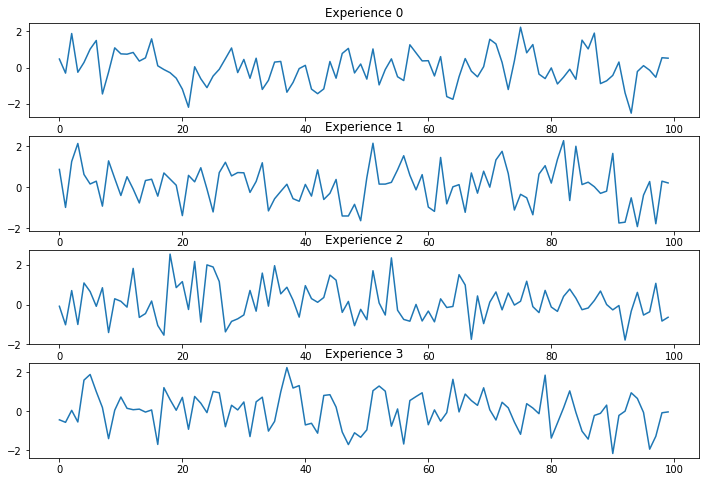

In [3]:
graphique(dataset)

# Vidéo 15

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
names = iris.target_names

In [17]:
def graphique(data, labels):
    nb = data.shape[1]
    
    for i, k in zip(range(nb), labels):
        plt.subplot(nb, 1, i+1)
        plt.title(k)
        plt.plot(data[:,i])
        
    plt.show()

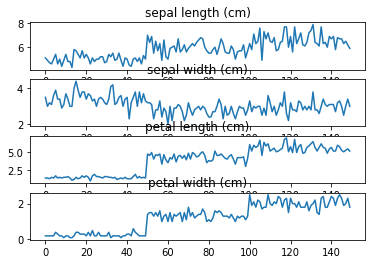

In [18]:
graphique(x, iris.feature_names)

# Vidéo 17

In [58]:
import pandas as pd
data = pd.read_excel('titanic3.xls')
data.drop(['name', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'ticket'], axis=1, inplace=True)
data.dropna(axis=0, inplace=True)

In [59]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [60]:
def ageCategory(age):
    if age <= 20:
        return '<20'
    if age <= 30:
        return '20<30'
    if age <= 40:
        return '30<40'
    else:
        return '>40'

data['age'] = data['age'].map(ageCategory)


In [61]:
data.groupby('age').mean()

,pclass,survived
age,,
20<30,2.371191,0.371191
30<40,2.109524,0.423810
<20,2.568548,0.459677
>40,1.643172,0.396476


# Vidéo 17

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.loc['2020-08-04'] = bitcoin.loc['2020-08-03']

In [6]:
bitcoin['Buy'] = np.zeros(len(bitcoin))
bitcoin['Sell'] = np.zeros(len(bitcoin))


print(bitcoin.shape)
bitcoin['Buy'][bitcoin['Close'] > bitcoin['Close'].shift(1).rolling(28).max()] = 1
bitcoin['Sell'][bitcoin['Close'] < bitcoin['Close'].shift(1).rolling(28).min()] = -1

(2168, 8)


In [7]:
def buy_sell(value):
    if value:
        return 1
    else:
        return -1

<AxesSubplot:xlabel='Date'>

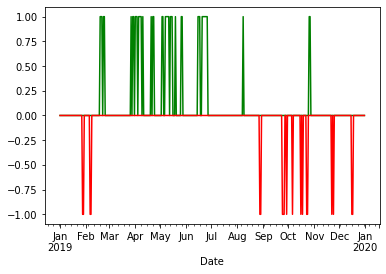

In [8]:
bitcoin['2019']['Buy'].plot(c='g')
bitcoin['2019']['Sell'].plot(c='r')